In [1]:
# ===== Load Cleaned Data =====
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
# Get the absolute path to the project root
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
# Add to sys.path if not already there
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

from src.config import DATA_INTERIM

In [3]:
bankDf_cleaned = pd.read_csv(os.path.join(DATA_INTERIM, "cleaned_data.csv"))

In [4]:
bankDf_cleaned.shape

(6362620, 9)

In [5]:
bankDf_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   step                   int64  
 1   type                   object 
 2   amount                 float64
 3   oldbalanceOrg          float64
 4   newbalanceOrig         float64
 5   oldbalanceDest         float64
 6   isFraud                int64  
 7   flag_dest_new_account  int64  
 8   transaction_hour       int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 436.9+ MB


In [6]:
bankDf_cleaned.describe().round(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,isFraud,flag_dest_new_account,transaction_hour
count,6362620.00,6362620.00,6362620.00,6362620.00,6.362620e+06,6362620.00,6362620.00,6362620.00
mean,243.40,179861.90,833883.10,855113.67,1.100702e+06,0.00,0.43,15.32
std,142.33,603858.23,2888242.67,2924048.50,3.399180e+06,0.04,0.49,4.32
min,1.00,0.00,0.00,0.00,0.000000e+00,0.00,0.00,0.00
25%,156.00,13389.57,0.00,0.00,0.000000e+00,0.00,0.00,12.00
50%,239.00,74871.94,14208.00,0.00,1.327057e+05,0.00,0.00,16.00
75%,335.00,208721.48,107315.18,144258.41,9.430367e+05,0.00,1.00,19.00
max,743.00,92445516.64,59585040.37,49585040.37,3.560159e+08,1.00,1.00,23.00


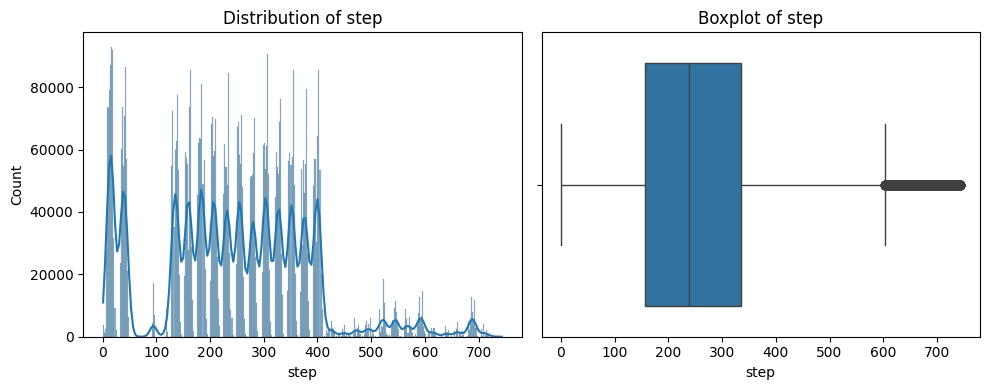

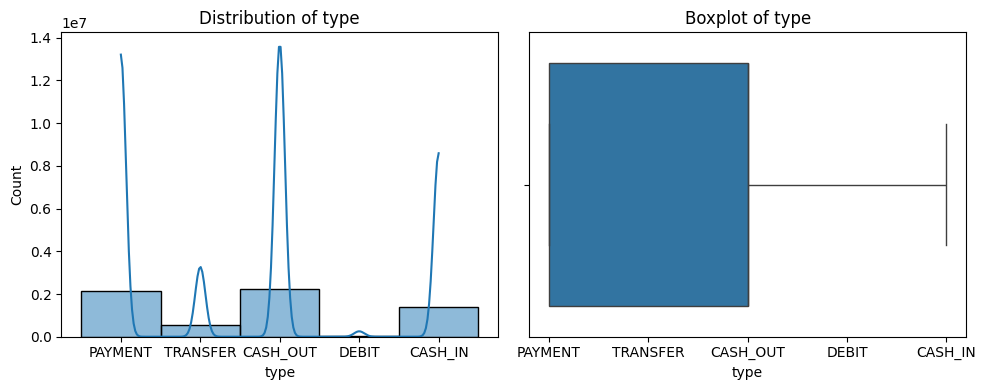

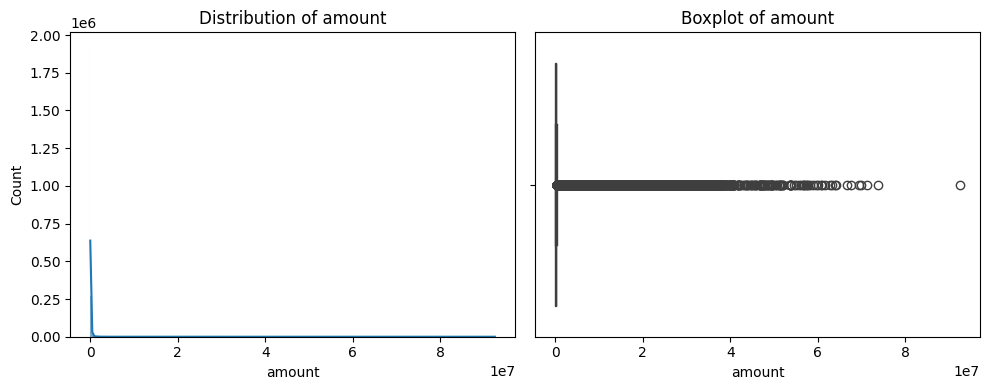

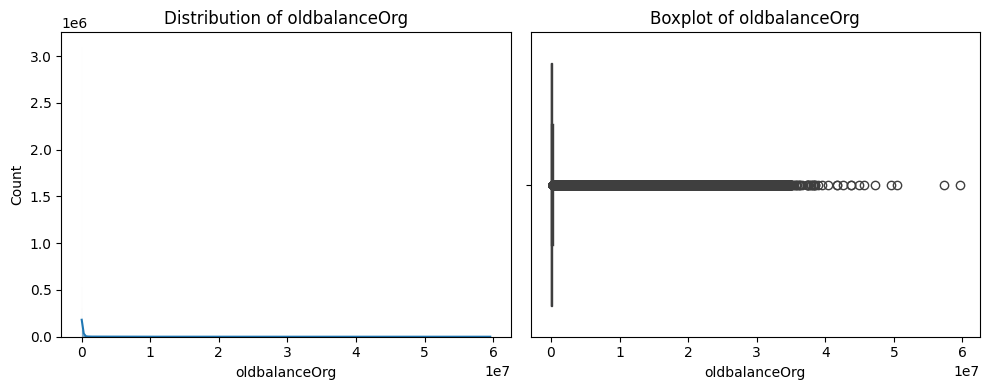

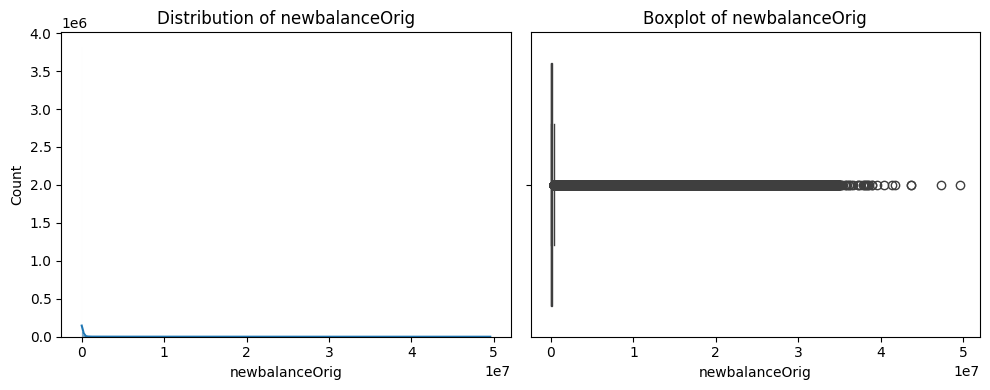

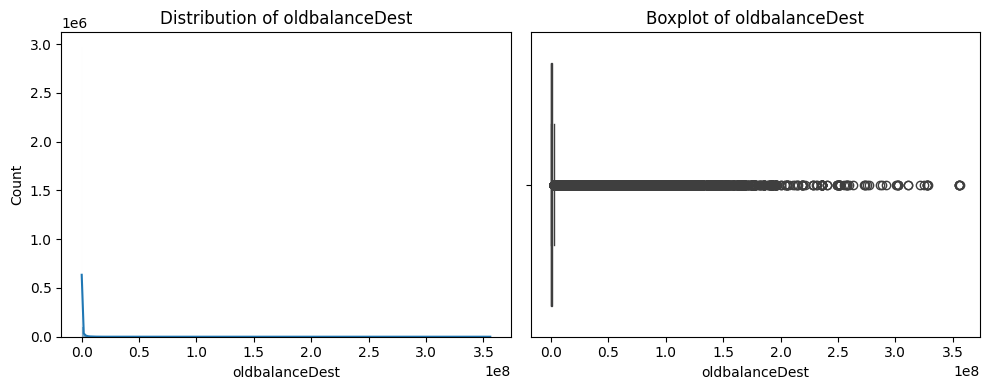

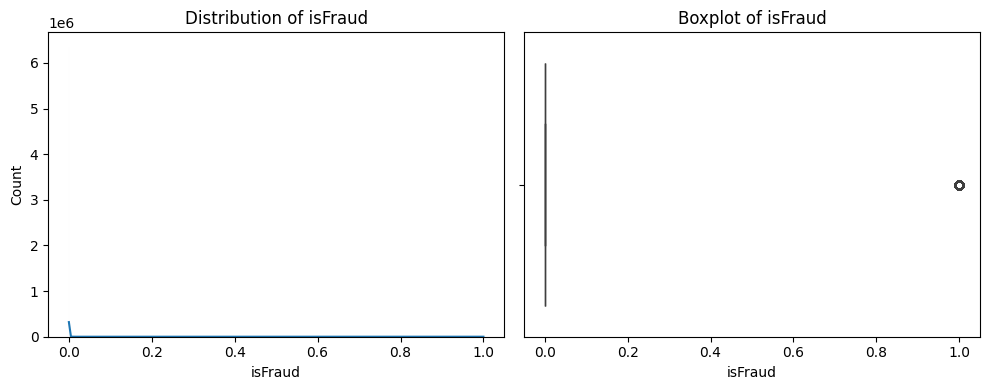

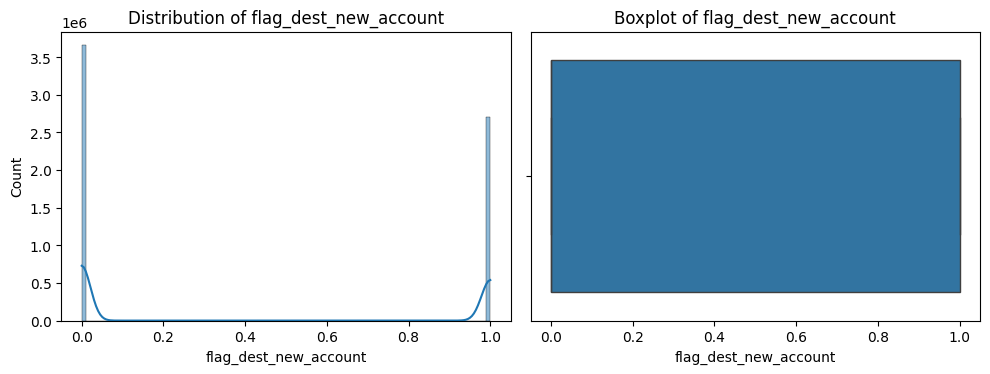

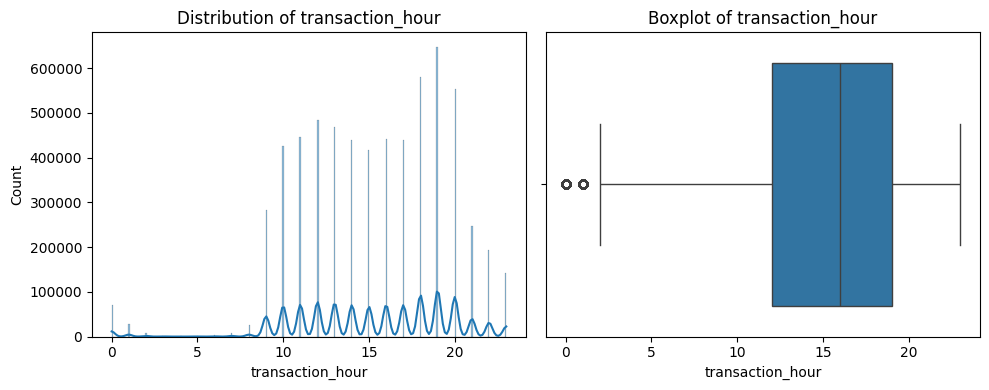

In [13]:
# ===== Check Distribution of Numeric Columns =====
numeric_cols = bankDf_cleaned.columns

for col in numeric_cols:
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))
    
    # Histogram
    sns.histplot(bankDf_cleaned[col], kde=True, ax=axes[0])
    axes[0].set_title(f"Distribution of {col}")
    
    # Boxplot
    sns.boxplot(x=bankDf_cleaned[col], ax=axes[1])
    axes[1].set_title(f"Boxplot of {col}")
    
    plt.tight_layout()
    plt.show()